## Use Case – Prediction using Logistic Regression

#### Problem Statement 
A car company has released a new SUV in the market. Using the previous data about the sales of their SUV’s, they want to predict the category of people who might be interested in buying this.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('SUV_Social_Network.csv')
data.shape

(400, 6)

In [5]:
data.head()

,Unnamed: 0,User ID,Gender,Age,EstimateSalary,Purchased
0,1,15624510,Male,19,19000,0
1,2,15810944,Male,35,20000,0
2,3,15668575,Female,26,43000,0
3,4,15603246,Female,27,57000,0
4,5,15804002,Male,19,76000,0


In [6]:
data.columns

Index(['Unnamed: 0', 'User ID', 'Gender', 'Age', 'EstimateSalary',
       '\nPurchased'],
      dtype='object')

In [102]:
#let's check missing values in data
data.isnull().sum()

Unnamed: 0        0
User ID           0
Gender            0
Age               0
EstimateSalary    0
\nPurchased       0
dtype: int64

In [8]:
data.rename(columns={"\nPurchased":"Purchased"}, inplace=True)

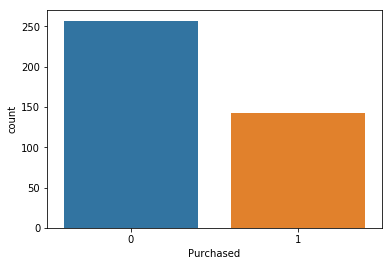

In [9]:
sns.countplot('Purchased', data= data)

In [10]:
#Let's sepreate target and predictor variable from dataset
X = data.iloc[:,[3,4]].values
y = data.iloc[:,5].values
print(X.shape)
print(y.shape)

(400, 2)
(400,)


In [11]:
# Let's split dataset for trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# We can also scale the input values for better performance using StandarScaler as shown below:
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
 
X_test = sc.transform(X_test)

### Now we will create our Logistic Regression model.

In [15]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

logr.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### We can use this and predict the results of our test set.

In [16]:
y_pred = logr.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_pred, y_test)
print("Accuracy Score:", acc_score)

Accuracy Score: 0.89


In [18]:
# Now, we can check how many predictions were accurate and how many were not using confusion matrix.
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_pred, y_test)
cm_lrc

array([[65,  8],
       [ 3, 24]])

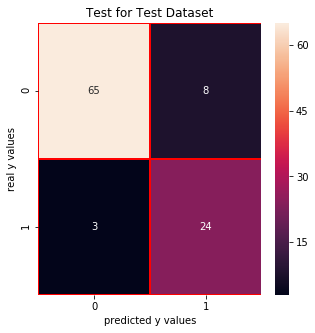

In [19]:
# cm visualization
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ", recall_score(y_test, y_pred))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred))

precision_score:  0.8888888888888888
recall_score:  0.75
f1_score:  0.8135593220338982


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.89

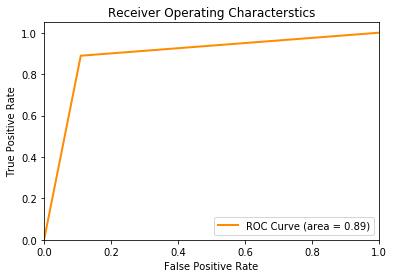

In [32]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label = 'ROC Curve (area = %0.2f)'% roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.legend(loc = 'lower right')
plt.show()

#### Test for Train Dataset

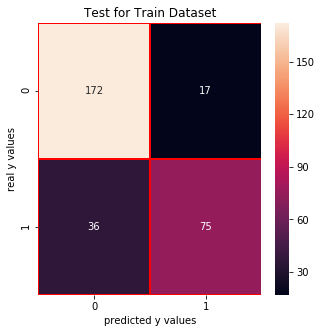

In [127]:
cm_lrc_train = confusion_matrix(y_train, logr.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()